# Example quantitative plots

How to plot the results of the quantitative evaluation.

In [2]:
import numpy as np
import os
import fnmatch
import pandas as pd
import sklearn.metrics as sm
import scipy.stats as ss
import matplotlib.pyplot as plt

import dense_correspondence_manipulation.utils.utils as utils
utils.add_dense_correspondence_to_python_path()

from dense_correspondence.evaluation.evaluation import DenseCorrespondenceEvaluationPlotter as DCEP

If you have multiple networks trained, you can add them to the `nets_list` below, and they will be plotted together.

In [3]:
folder_name = "tutorials"
path_to_nets = os.path.join("code/data_volume/pdc_synthetic_2/trained_models", folder_name)
path_to_nets = utils.convert_to_absolute_path(path_to_nets)
all_nets = sorted(os.listdir(path_to_nets))
nets_to_plot = []
# nets_list = ["rope_1567_contorted_task_16", "rope_1567_contorted_task_9", "rope_1567_contorted_task_3"]
# nets_list = ["rope_1567_contorted_task_3", "rope_1567_contorted_task_rgb_3"]
# nets_list = ["rope_1254_contorted_task_depth_3", "rope_784_contorted_task_depth_3", "rope_523_contorted_task_depth_3"]
# nets_list = ["rope_1567_task_loops_noisy_16", "rope_1567_task_loops_noisy_9", "rope_1567_task_loops_noisy_3"]
# nets_list = ["rope_1567_task_loops_rgb", "rope_1567_task_loops_noisy_3"]
# nets_list = ["rope_1254_task_loops_3", "rope_784_task_loops_3", "rope_523_task_loops_3"]
# nets_list = ["rope_1567_task_loops_rgb_raw_occl", "rope_1567_task_loops_rgb"]
# nets_list = ["rope_515_task_loops_noisy_no_sphere_3", "rope_523_task_loops_3"]
nets_list = ["rope_523_task_loops_quartersize_3", "rope_523_task_loops_halfsize_3", "rope_523_task_loops_3"]
labels = ["523vert_3dim_depth_loops_1/4size", "523vert_3dim_depth_loops_1/2size", "523vert_3dim_depth_loops"]
for net in nets_list:
    nets_to_plot.append(os.path.join(folder_name,net))

# Training 
Evaluate the network on the training scenes. Correspondences are all within scene

summed errors 29.375119614124948
summed errors 22.25845853271118
summed errors 23.224585407170686
summed errors 23.224585407170686


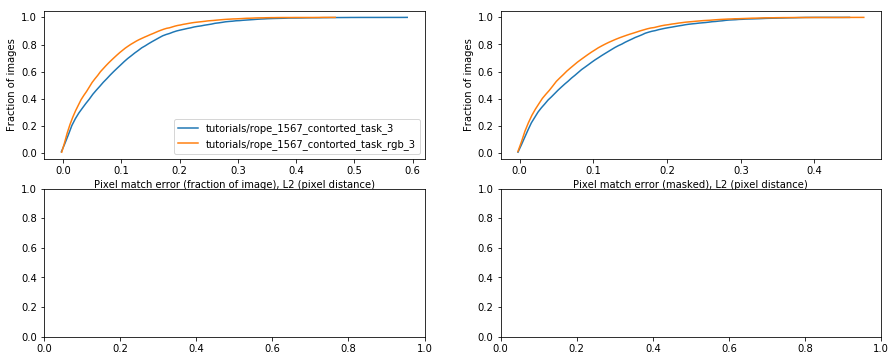

In [6]:
p = DCEP()
dc_source_dir = utils.getDenseCorrespondenceSourceDir()

network_name = nets_to_plot[0]
path_to_csv = os.path.join(dc_source_dir, "data_volume", "pdc_synthetic_2", "trained_models", network_name, "analysis/train/data.csv")
fig_axes = DCEP.run_on_single_dataframe(path_to_csv, label=network_name, save=False)


for network_name in nets_to_plot[1:]:
    path_to_csv = os.path.join(dc_source_dir, "data_volume", "pdc_synthetic_2", "trained_models", network_name, "analysis/train/data.csv")
    fig_axes = DCEP.run_on_single_dataframe(path_to_csv, label=network_name, previous_fig_axes=fig_axes, save=False)

_, axes = fig_axes
# axes[0].set_title("Training Set")
plt.show()

# Test
Evaluate the network on the test scenes. Correspondences are all within scene

summed errors 7.613871401132833
summed errors 6.780198398455319
summed errors 14.080666159180002
summed errors 11.651205990061923
summed errors 33.36346023387975
summed errors 23.292964917195718


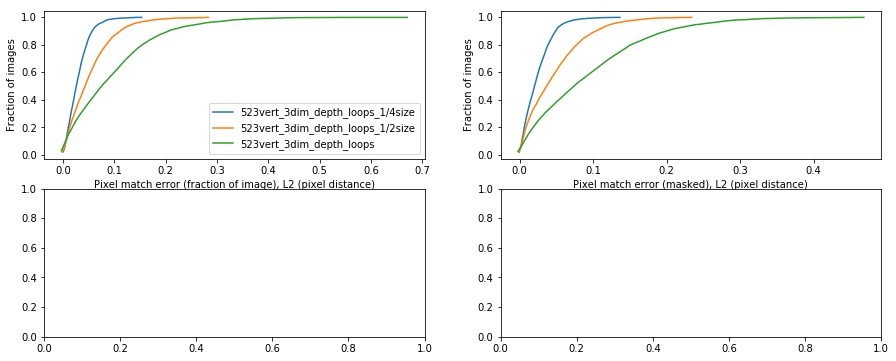

In [4]:
p = DCEP()
dc_source_dir = utils.getDenseCorrespondenceSourceDir()

network_name = nets_to_plot[0]
path_to_csv = os.path.join(dc_source_dir, "data_volume", "pdc_synthetic_2", "trained_models", network_name, "analysis/test/data.csv")
fig_axes = DCEP.run_on_single_dataframe(path_to_csv, label=labels[0], save=False)

for i, network_name in enumerate(nets_to_plot[1:]):
    path_to_csv = os.path.join(dc_source_dir, "data_volume", "pdc_synthetic_2", "trained_models", network_name, "analysis/test/data.csv")
    fig_axes = DCEP.run_on_single_dataframe(path_to_csv, label=labels[i+1], previous_fig_axes=fig_axes, save=False)

_, axes = fig_axes
# axes[0].set_title("Test Set")
plt.show()

## Cross Scene Single Object
Evaluate the network on correspondences that come from different scenes. These correspondences were manually annotated only for evaluation purposes.

ZeroDivisionError: float division by zero

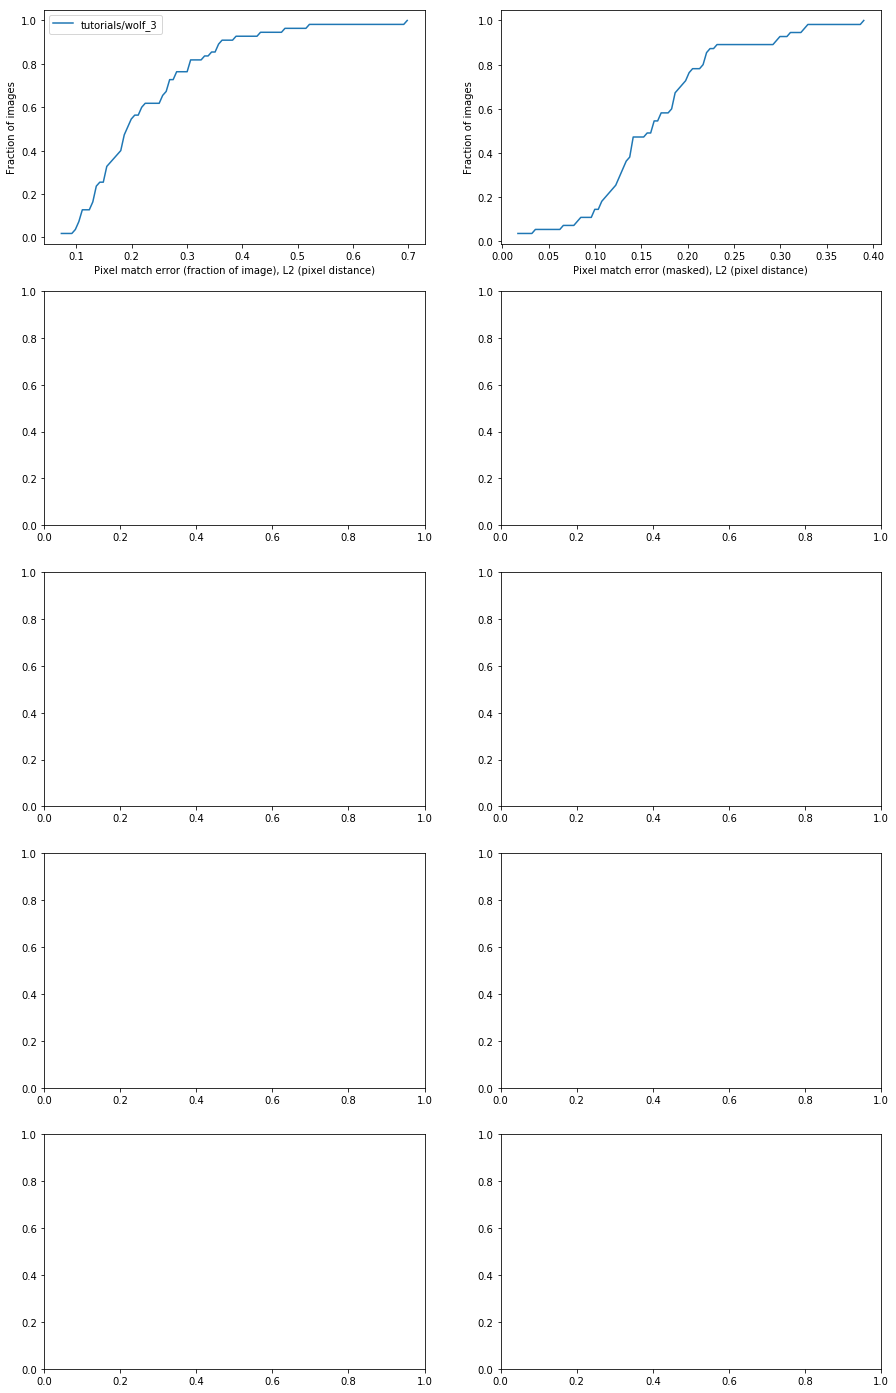

In [5]:
p = DCEP()
dc_source_dir = utils.getDenseCorrespondenceSourceDir()

network_name = nets_to_plot[0]
path_to_csv = os.path.join(dc_source_dir, "data_volume", "pdc_synthetic", "trained_models", network_name, "analysis/cross_scene/data.csv")
fig_axes = DCEP.run_on_single_dataframe(path_to_csv, label=network_name, save=False)

for network_name in nets_to_plot[1:]:
    path_to_csv = os.path.join(dc_source_dir, "data_volume", "pdc_synthetic", "trained_models", network_name, "analysis/cross_scene/data.csv")
    fig_axes = DCEP.run_on_single_dataframe(path_to_csv, label=network_name, previous_fig_axes=fig_axes, save=False)

_, axes = fig_axes
# axes[0].set_title("Cross Scene Set")
plt.show()